## Module -3
Lab 3 – Predicting a Categorical Target and Evaluating Performance

## Lab 3: Project (Titanic)
## Priyanka Naskar
### 3/29/25

In this project, we are going to use a model to predict survival on the Titanic from various input features. We will train multiple models, evaluate performance using key metrics, and create visualizations to interpret the results.

We use three common classification models in this lab.

Decision Tree Classifier (DT)

A Decision Tree splits data into smaller groups based on decision rules (like "is height greater than 150 cm?"). It’s like a flowchart, where each decision point leads to another question until a final classification is reached.

Strengths: Easy to interpret and fast to train.
Weaknesses: Can overfit if the tree becomes too complex.
Support Vector Machine (SVM)

A Support Vector Machine tries to find the "best boundary" (a hyperplane) that separates data into classes. It works well with complex data and small datasets.

Strengths: Effective when there is a clear margin of separation between classes.
Weaknesses: Computationally expensive for large datasets.
Neural Network (NN)

A Neural Network is inspired by how human brains process information. It consists of layers of interconnected "neurons" that process input data and adjust based on feedback

Strengths: Can handle complex patterns and non-linear relationships.
Weaknesses: Needs more data and tuning to avoid overfitting.
When trying to classify data, using three (or more) models can help:

Decision Trees illustrate how individual features contribute to classification.
SVMs are good at finding complex boundaries.
Neural Networks are good at learning patterns from complex data.

## Section 1. Import and Inspect the Data

Load the titanic dataset from the directly from the seaborn library.

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

## Section 2. Data Exploration and Preparation

In [2]:
# Input missing values for age using the median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Fill in missing values
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

# Create new features
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

## Section 3 - Feature Selection and Justification

In [3]:
# Case 1: alone only 
X1 = titanic[['alone']]
y1 = titanic['survived']

# Case 2: age only
X2 = titanic[['age']]
y2 = titanic['survived']

# Case 3: age + family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['survived']

### Reflection

### Why are these features selected? 

These features can both be related to each other and have impact on survivability.


### Are there features that are likely to be highly predictive of survival?

 I think they will be moderately predictive.

### Section 4 - Split Data, Create and Train Model, Predict and Evaluate Model Performance, Report Confusion Matrix, Report Decision Tree Plot

### Case 1

In [4]:
# Split Data

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X1, y1):
    X1_train = X1.iloc[train_indices]
    X1_test = X1.iloc[test_indices]
    y1_train = y1.iloc[train_indices]
    y1_test = y1.iloc[test_indices]

print('Train size: ', len(X1_train), 'Test size: ', len(X1_test))

Train size:  712 Test size:  179


In [5]:
# Create and Train Decision Tree
 
tree_model = DecisionTreeClassifier()
tree_model.fit(X1_train, y1_train)

DecisionTreeClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [6]:
# Predict and evaluate training data (X train)

y1_pred = tree_model.predict(X1_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y1_train, y1_pred)) 

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712



In [7]:
# Predict and evaluate test data

y1_test_pred = tree_model.predict(X1_test)
print("Results for Decision Tree on test data:")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



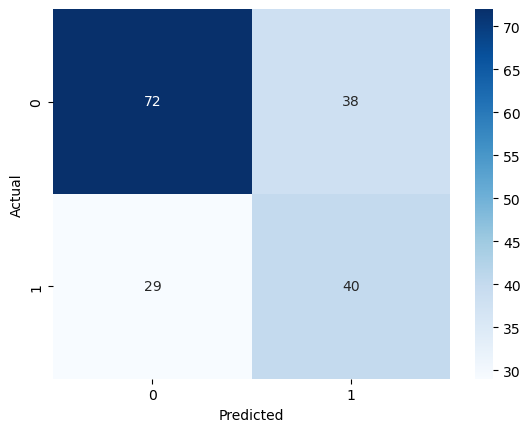

In [8]:
# Report Confusion Matrix

cm = confusion_matrix(y1_test, y1_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

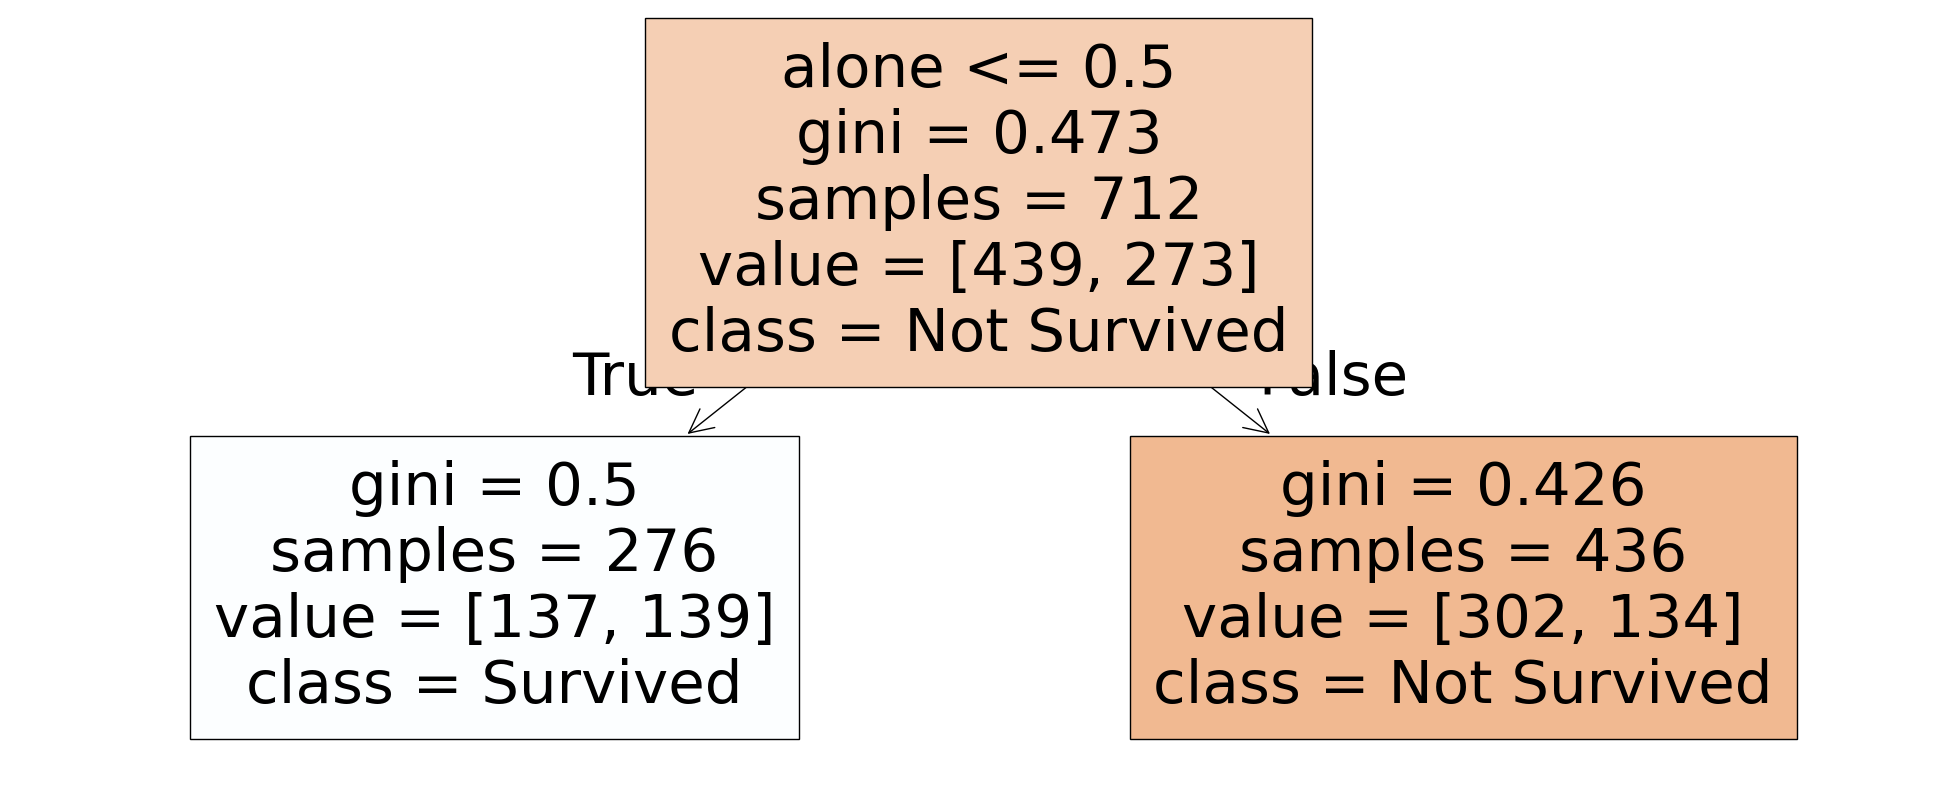

In [9]:
# Report Decision Tree Plot

fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X1.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic_case_1.png")

### Case 2


In [10]:
# Split Data

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X2, y2):
    X2_train = X2.iloc[train_indices]
    X2_test = X2.iloc[test_indices]
    y2_train = y2.iloc[train_indices]
    y2_test = y2.iloc[test_indices]

print('Train size: ', len(X2_train), 'Test size: ', len(X2_test))

Train size:  712 Test size:  179


In [11]:
# Create and Train Decision Tree
 
tree_model = DecisionTreeClassifier()
tree_model.fit(X2_train, y2_train)

DecisionTreeClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [12]:
# Predict and evaluate training data (X train)

y2_pred = tree_model.predict(X2_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y2_train, y2_pred))  

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712



In [13]:
# Predict and evaluate test data

y2_test_pred = tree_model.predict(X2_test)
print("Results for Decision Tree on test data:")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



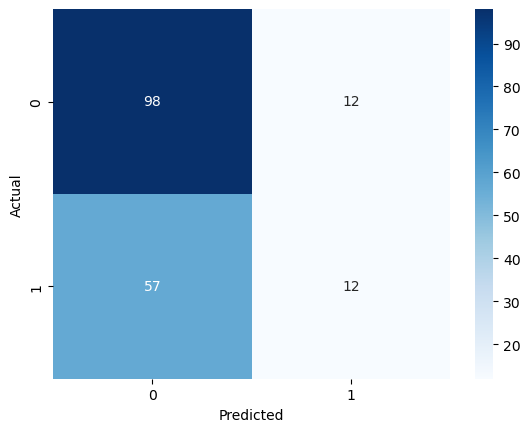

In [14]:
# Report Confusion Matrix

cm = confusion_matrix(y2_test, y2_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

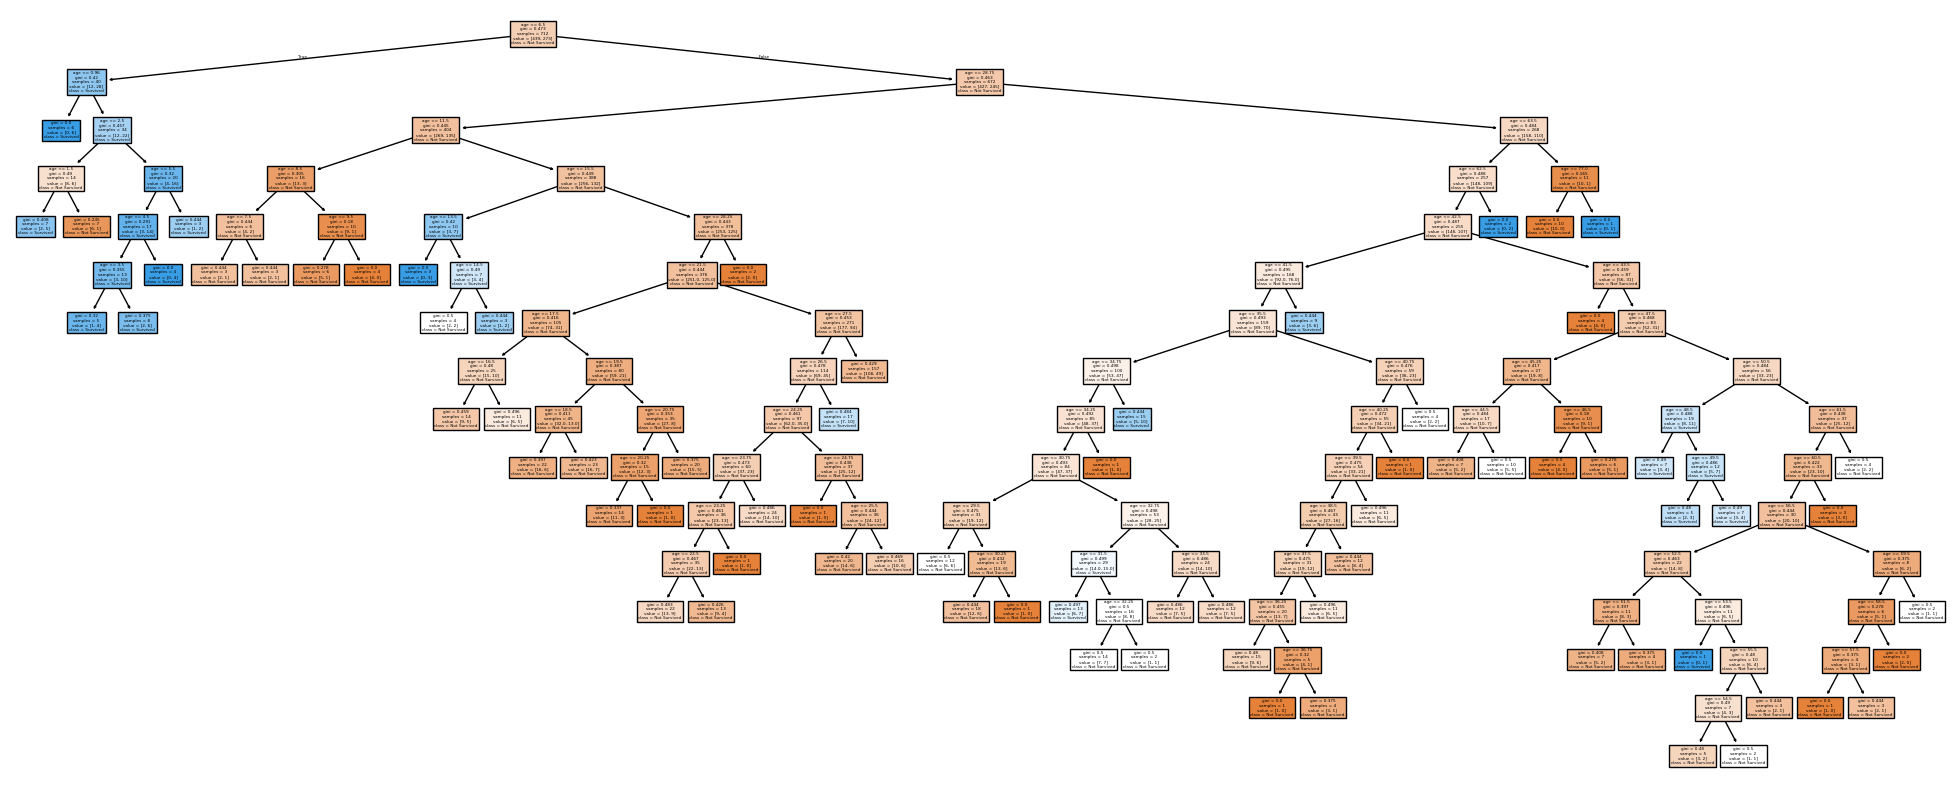

In [15]:
# Report Decision Tree Plot

fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X2.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic_case_2.png")

### Case 3

In [16]:
# Split Data

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X3, y3):
    X3_train = X3.iloc[train_indices]
    X3_test = X3.iloc[test_indices]
    y3_train = y3.iloc[train_indices]
    y3_test = y3.iloc[test_indices]

print('Train size: ', len(X3_train), 'Test size: ', len(X3_test))

Train size:  712 Test size:  179


In [17]:
# Create and Train Decision Tree
 
tree_model = DecisionTreeClassifier()
tree_model.fit(X3_train, y3_train)

DecisionTreeClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org

In [18]:
# Predict and evaluate training data (X train)

y3_pred = tree_model.predict(X3_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y3_train, y3_pred)) 

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712



In [19]:
# Predict and evaluate training data (X train)

y3_pred = tree_model.predict(X3_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y3_train, y3_pred)) 

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712



In [20]:
# Predict and evaluate test data

y3_test_pred = tree_model.predict(X3_test)
print("Results for Decision Tree on test data:")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179



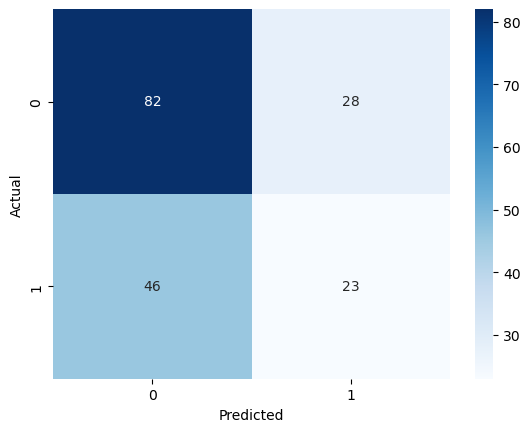

In [21]:
# Report Confusion Matrix

cm = confusion_matrix(y3_test, y3_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

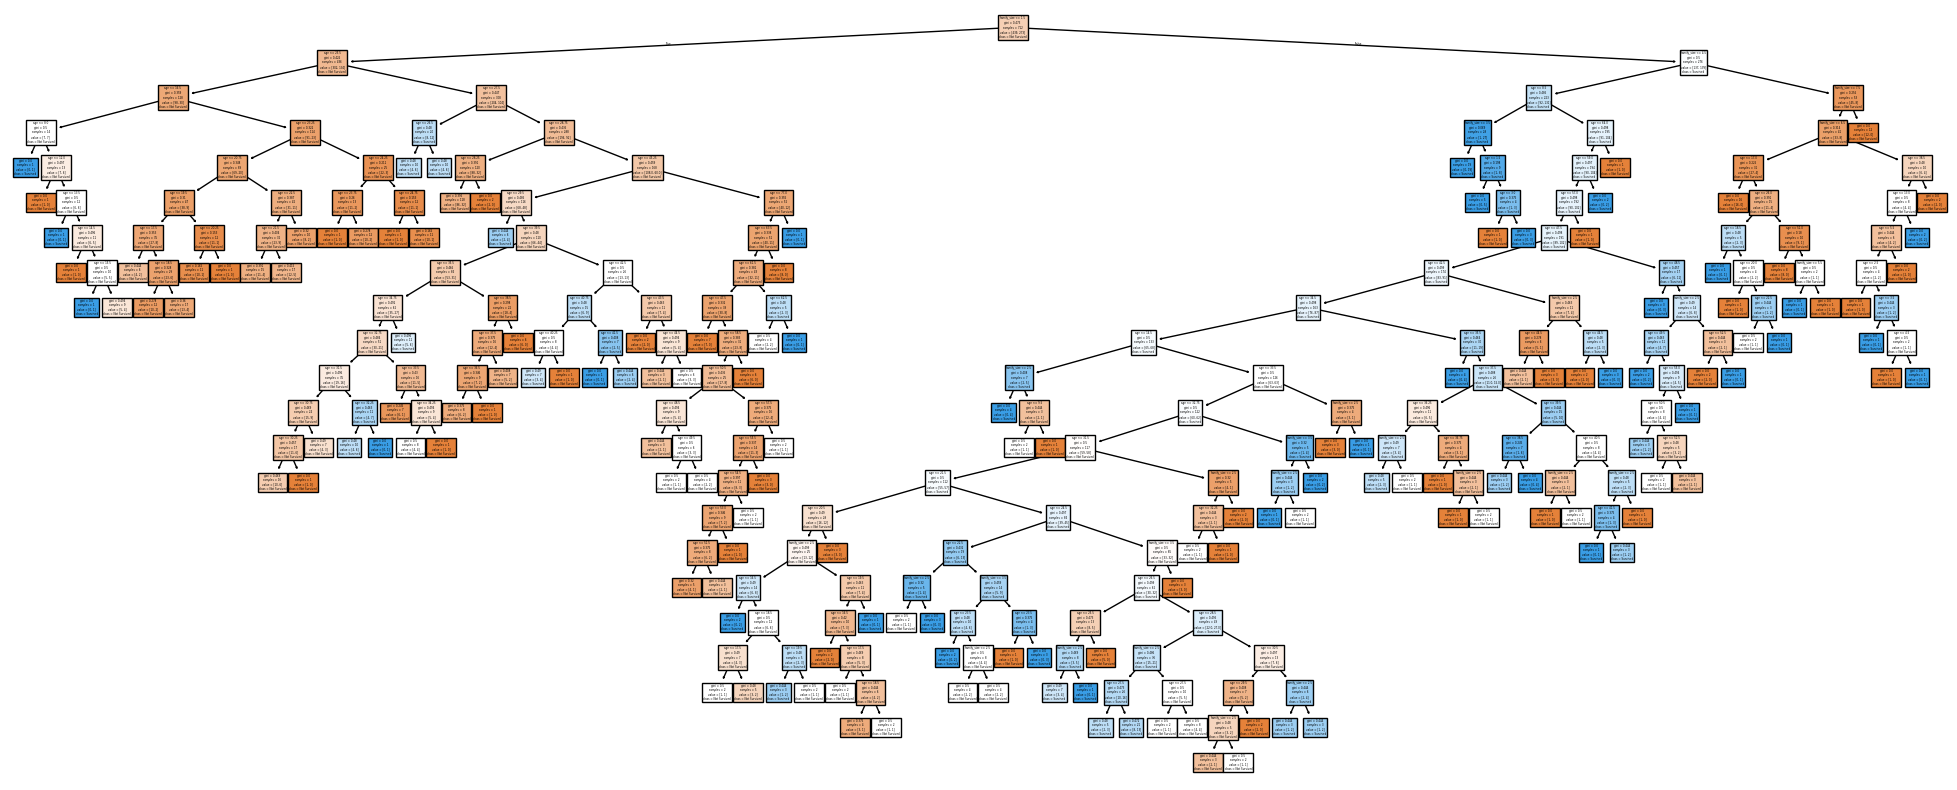

In [22]:
# Report Decision Tree Plot

fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X3.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic_case_3.png")

### Reflection

### How well did the different cases perform?

 I would say case 1 performed the most consistently with all of the precision, accuract, and recall weighted averages between 62-64 on both the training and testing data. 
 Case 2 all of the test numbers were lower than the training numbers suggesting a potential performance gap and overfitting. 
 Case 3 the performance gap is worse than case 2.
 I think this is due to class imbalance in the data as the survive rate was very low so when you introduce multiple variables the survival rate actually drops in this case.

### Are there any surprising results? 

I originally thought case 3 would be more accurate because more variables can often mean more accuracy but after evaluating the results it makes sense based on this analysis where it would actually be the least accurate due to class imbalance of survivability.

### Which inputs worked better? 

In my test cases Alone worked best

## Section 5 Compare Alternative Models

In [23]:
# Train SVC Model

svc_model = SVC()
svc_model.fit(X1_train, y1_train)


SVC()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [24]:
# Predict and evaluate SVC Model

y_pred_svc = svc_model.predict(X1_test)

print("Results for SVC on test data:")
print(classification_report(y1_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



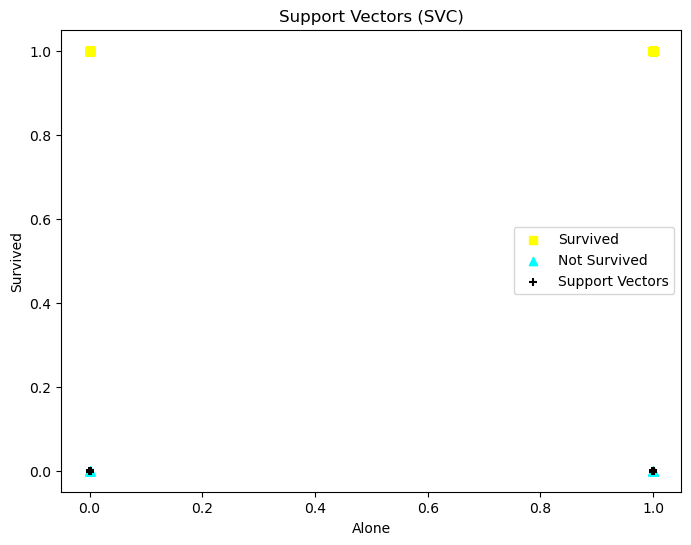

In [25]:
# Create data for charting - input target yes and input target no
survived_alone = X1_test.loc[y1_test == 1, 'alone']
not_survived_alone = X1_test.loc[y1_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_alone, y1_test.loc[y1_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y1_test.loc[y1_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (alone)
    support_y = svc_model.support_vectors_[:, 1] if svc_model.support_vectors_.shape[1] > 1 else None
    
    # Plot support vectors
    if support_y is not None:
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()


In [26]:
# Train NN MLP (neural network multi level perceptron) Model

nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X1_train, y1_train) 

MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')

MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [28]:
# Predict and Evaluate NN Model

y_pred_nn = nn_model.predict(X1_test)

print("Results for Neural Network on test data:")
print(classification_report(y1_test, y_pred_nn))

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



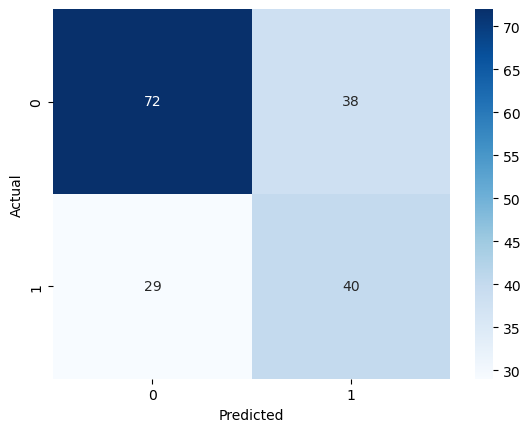

In [29]:
# Plot Confusion Matrix

cm_nn = confusion_matrix(y1_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Reflection

### How well did each model perform? 

Both performed with similar results as the previous tests

### Are there any surprising results?

 Not at this time but this was very basic inputs

### Why might one model outperform the others?

The most common reason would be distribution of data and how linear the data is.

### Section 6 - Summary
 
 ### Final Thoughts & Insights

6.1 Summarize Findings

In this lab we used the Titanic data set to explore predictive models based on variable inputs. The results show that some are better predictors than others when working with survivability. It also shows that Survivability has limitations when using predictors because this dataset and that variable is prone to overfitting as there was a small amount of survivors compared to overall passengers even in this data. This is just an introduction into these tools and can be manipulated over time to create more predictable and more accurate results.

### Comparison chart

| Model Type             | Case  | Features Used       | Accuracy | Precision | Recall | F1-Score | Notes |
|------------------------|------|---------------------|----------|-----------|--------|----------|-------|
| Decision Tree         | Case 1 | alone              | 0.63%    | 0.64%     | 0.63%  | 0.63%    | -     |
|                        | Case 2 | age                | 0.68%    | 0.68%     | 0.68%  | 0.64%    | -     |
|                        | Case 3 | age + family_size  | 0.77%    | 0.77%     | 0.77%  | 0.76%    | -     |
| SVM (RBF Kernel)      | Case 1 | alone              | 0.63%    | 0.64%     | 0.63%  | 0.63%    | -     |
| Neural Network (MLP)  | Case 1 | alone              | 0.63%    | 0.64%     | 0.63%  | 0.63%    | -     |
